### Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Conexión SQL
# ==============================================================================
import psycopg2 as ps

import seaborn as sns

#Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
# ==============================================================================
import statsmodels.formula.api as sfm 

from sklearn.preprocessing import PolynomialFeatures 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn import linear_model

### Conexión SQL

In [2]:
conexion = ps.connect(host="codbview.c21jlbp5d5qr.us-east-1.rds.amazonaws.com", database="codb", user="sgonzalez", password="AdarlaToda100%",port="5432")

In [3]:
# Creamos el cursor con el objeto conexion
cur = conexion.cursor()

# Ejecutamos una consulta
sql = """
select ipc, activations, radio, tv, ooh, pop, digital_performance, eventos_alto_bitacora, eventos_bajo_bitacora, 
eventos_medio_bitacora 
from sal_indicators_in sa 
where sales_channel = 'Punto Partner'
"""

consulta = cur.execute(sql)

data = cur.fetchall()

In [4]:
df = pd.DataFrame(data,columns=['ipc','activations','radio','tv','ooh','pop','digital_performance','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df['ipc']=df['ipc'].astype('float')
df['eventos_alto_bitacora']=df['eventos_alto_bitacora'].astype('float')
df['eventos_bajo_bitacora']=df['eventos_bajo_bitacora'].astype('float')
df['eventos_medio_bitacora']=df['eventos_medio_bitacora'].astype('float')


df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,pop,digital_performance,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,1.60,30,41687525,771166,0,2884220.0,365633245,0.00,0.0,1.00
1,1.56,19,57231920,95440163,79373000,8170000.0,422084086,0.75,0.0,0.25
2,1.51,23,116243171,194643334,0,0.0,429255030,1.00,0.0,0.00
3,1.95,13,117469351,366792554,0,34349575.0,426026002,0.30,0.1,0.60
4,3.30,7,131734088,320208915,0,34349575.0,372675824,1.00,0.0,0.00


### Distribución de los Datos

<Figure size 2160x1440 with 0 Axes>

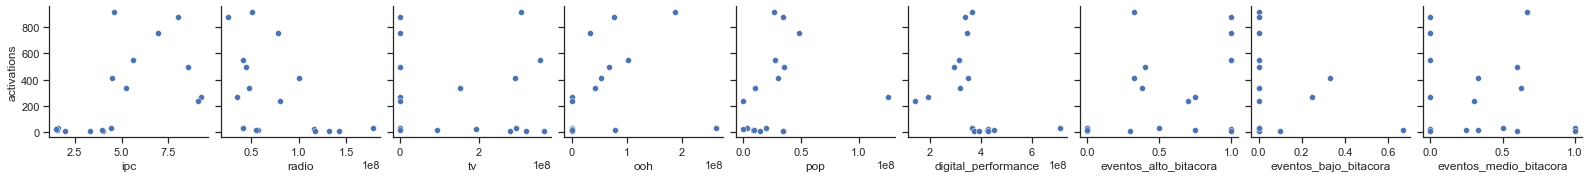

In [5]:
plt.figure(figsize=(30,20)) 
sns.set_theme(style="ticks")

sns.pairplot(df, x_vars=['ipc','radio','tv','ooh','pop','digital_performance','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'], y_vars=['activations']) 

plt.show()

### Correlaciones

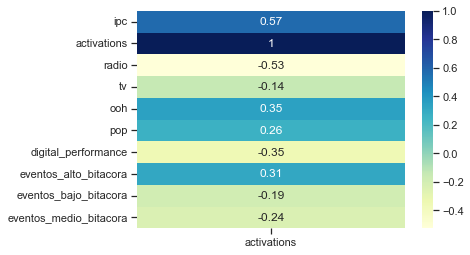

In [6]:
corrMatrix_1 = df.corr(method ='pearson')[['activations']]


sns.heatmap(corrMatrix_1, annot=True,cmap="YlGnBu")

plt.show()

### Omitir Variables 
De acuerdo a su correlación

In [7]:
del df['eventos_medio_bitacora']
#del df['radio']
#del df['ipc']
#del df['eventos_alto_bitacora']
#del df['ooh']
#del df['pop']
del df['tv']
#del df['rotacion']
#del df['comisiones']
del df['digital_performance']
del df['eventos_bajo_bitacora']

### Regresión Lineal

In [8]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns='activations',axis=1)
y = df['activations']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.7957558080917873
MAE:  103.16030315425648
MSE:  18662.13647672724

explained_variance: 0.7975002149443609




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            activations   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.695
Method:                 Least Squares   F-statistic:                              8.757
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                     0.00107
Time:                        21:07:37   Log-Likelihood:                         -114.14
No. Observations:                  17   AIC:                                      238.3
Df Residuals:                      12   BIC:                                      242.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ipc                      57.9193     22.459      2.579      0.024       8.986     106.853
radio                 -2.365e-06   1.01e-06     -2.352      0.037   -4.56e-06   -1.74e-07
ooh                     1.72e-06   8.19e-07      2.100      0.058   -6.47e-08    3.51e-06
pop                   -4.594e-07   2.42e-06     -0.190      0.853   -5.74e-06    4.82e-06
eventos_alto_bitacora   185.2622    162.057      1.143      0.275    -167.830     538.355
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.393
Skew:                           0.125   Prob(JB):                        0.822
Kurtosis:                       2.299   Cond. No.                     3.24e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['ipc', 'radio', 'ooh', 'pop', 'eventos_alto_bitacora'], dtype='object')

w = [[ 3.55519006e+01 -3.24852162e-06  1.59840292e-06 -1.68993522e-07
   7.87370445e+01]], b = [248.34162483]


In [10]:
model.params

ipc                      5.791930e+01
radio                   -2.365197e-06
ooh                      1.720229e-06
pop                     -4.594369e-07
eventos_alto_bitacora    1.852622e+02
dtype: float64

\begin{align}
\dot{activations} = \ -ipc(3.55519006e+01) - radio(3.24852162e-06) + ooh(1.59840292e-06) + pop(3.53512939e-05) - eventos_alto_bitacora(2.78104862e+04) + 93431.01987797\\
\end{align}

### Modelo Regresión Activaciones con Recarga y con PAC

In [11]:
# Creamos el cursor con el objeto conexion
cur2 = conexion.cursor()

# Ejecutamos una consulta
sql2 = """
select activations, activations_w_topups, activations_pacs
from sal_indicators_in sa 
where sales_channel = 'Punto Partner'
"""

consulta2 = cur2.execute(sql2)

data2 = cur2.fetchall()

In [12]:
df2 = pd.DataFrame(data2,columns=['activations', 'activations_w_topups', 'activations_pacs'])



df2 = df2.fillna(0)
#df = df.dropna()

df2.head()

,activations,activations_w_topups,activations_pacs
0,30,15,21
1,19,14,20
2,23,15,17
3,13,15,20
4,7,5,11


##### Recargas

In [13]:
# División de los datos en train y test
# ==============================================================================

X = df2[['activations']]
y = df2['activations_w_topups']


X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.7778725046121029
MAE:  89.8214664917227
MSE:  11162.184302611062

explained_variance: 0.9090996410470686




<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     activations_w_topups   R-squared (uncentered):                   0.959
Model:                              OLS   Adj. R-squared (uncentered):              0.956
Method:                   Least Squares   F-statistic:                              370.5
Date:                  Tue, 05 Jul 2022   Prob (F-statistic):                    1.73e-12
Time:                          21:07:37   Log-Likelihood:                         -92.600
No. Observations:                    17   AIC:                                      187.2
Df Residuals:                        16   BIC:                                      188.0
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
activations     0.6288      0.033     19.248      0.000       0.560       0.698
==============================================================================
Omnibus:                       14.930   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.603
Skew:                          -1.501   Prob(JB):                      0.00111
Kurtosis:                       6.192   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations'], dtype='object')

w = [[0.52765675]], b = [16.40229942]


\begin{align}
\dot{activations W topups} = \ activations(0.52765675) + 16.40229942\\
\end{align}

##### PACS

In [15]:
# División de los datos en train y test
# ==============================================================================
X = df2[['activations_w_topups']]
y = df2['activations_pacs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9369978522075131
MAE:  26.729467022212873
MSE:  1944.069087335481

explained_variance: 0.9462091316129052




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       activations_pacs   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1090.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    3.79e-16
Time:                        21:07:37   Log-Likelihood:                         -80.143
No. Observations:                  17   AIC:                                      162.3
Df Residuals:                      16   BIC:                                      163.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
activations_w_topups     0.8071      0.024     33.016      0.000       0.755       0.859
==============================================================================
Omnibus:                        7.037   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                4.074
Skew:                           0.918   Prob(JB):                        0.130
Kurtosis:                       4.544   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations_w_topups'], dtype='object')

w = [[0.75739325]], b = [12.13745294]


\begin{align}
\dot{activations PACs} = \ activationsWtopups(0.75739325) + 12.13745294\\
\end{align}